# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [78]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [79]:
data.head(2)
#data.columns

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [80]:
data.shape

(109248, 9)

In [81]:
#Loading only 50k rows from preprocessed_data
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)
data.shape

(50000, 9)

In [82]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [83]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [84]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)

#I have chosen to apply k-fold CV hence spliting the data into Test and Train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
print("Train Dataset")
print(X_train.shape, y_train.shape)
print("Test Dataset")
print(X_test.shape, y_test.shape)

Train Dataset
(35000, 8) (35000,)
Test Dataset
(15000, 8) (15000,)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [85]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)


In [86]:
# Performing Bag of Words Vectorization of text data.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
#print(vectorizer.get_feature_names())
bow_features = vectorizer.get_feature_names()
print("="*100)

After vectorizations
(35000, 5000) (35000,)
(15000, 5000) (15000,)


In [88]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)


In [89]:
# Performing tfidf vectorization of text data.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfid = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfid = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfid.shape, y_train.shape)
print(X_train_essay_tfid.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 5000) (35000,)
(35000, 5000) (15000,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [90]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

In [91]:
# performing one-hot encoding of categorical features.

## one-hot encoding of categorical feature: teacher_prefix

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After one-hot encoding of categorical feature: teacher_prefix")
#print(type(X_train_teacher_ohe))
#print(X_train_teacher_ohe.toarray()[1])
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
X_train_teacher_features = vectorizer.get_feature_names()
print("="*100)


After one-hot encoding of categorical feature: teacher_prefix
(35000, 5) (35000,)
(15000, 5) (15000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [92]:
## one-hot encoding of categorical feature: project_grade_category

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_prjt_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_prjt_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After one-hot encoding of categorical feature: project_grade_category")
#print(type(X_train_prjt_grade_category_ohe))
#print(X_train_prjt_grade_category_ohe.toarray()[1])
print(X_train_prjt_grade_category_ohe.shape, y_train.shape)
print(X_test_prjt_grade_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
X_train_prjt_grade_category_features = vectorizer.get_feature_names()
print("="*100)


After one-hot encoding of categorical feature: project_grade_category
(35000, 4) (35000,)
(15000, 4) (15000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [93]:
## one-hot encoding of categorical feature: school_state

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After one-hot encoding of categorical feature: school_state")
#print(type(X_train_prjt_grade_category_ohe))
#print(X_train_prjt_grade_category_ohe.toarray()[1])
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
X_train_school_state_features = vectorizer.get_feature_names()
print("="*100)

After one-hot encoding of categorical feature: school_state
(35000, 51) (35000,)
(15000, 51) (15000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [94]:
## one-hot encoding of categorical feature: clean_categories

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After one-hot encoding of categorical feature: clean_categories")
#print(type(X_train_clean_categories_ohe))
#print(X_train_clean_categories_ohe.toarray()[1])
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
X_train_clean_categories_features = vectorizer.get_feature_names()
print("="*100)

After one-hot encoding of categorical feature: clean_categories
(35000, 9) (35000,)
(15000, 9) (15000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [95]:
## one-hot encoding of categorical feature: clean_subcategories

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After one-hot encoding of categorical feature: clean_subcategories")
#print(type(X_train_clean_subcategories_ohe))
#print(X_train_clean_subcategories_ohe.toarray()[1])
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
X_train_clean_subcategories_features = vectorizer.get_feature_names()
print("="*100)

After one-hot encoding of categorical feature: clean_subcategories
(35000, 30) (35000,)
(15000, 30) (15000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [96]:
#performing normalization of numerical feature : Price
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)

X_test_price_norm = X_test_price_norm.reshape(-1,1)


print("After normalization of numerical feature : Price")
#print(X_train_price_norm[0:10])
#print(X_test_price_norm[0:10])
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After normalization of numerical feature : Price
(35000, 1) (35000,)
(15000, 1) (15000,)


In [97]:
#performing normalization of numerical feature :  teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)


print("After normalization of numerical feature :  teacher_number_of_previously_posted_projects")
#print(X_train_price_norm[0:10])
#print(X_test_price_norm[0:10])
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After normalization of numerical feature :  teacher_number_of_previously_posted_projects
(35000, 1) (35000,)
(15000, 1) (15000,)


In [98]:
# formulating set1 dataset : categorical, numerical features + preprocessed_eassay (BOW)
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_teacher_ohe, X_train_prjt_grade_category_ohe, X_train_school_state_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_essay_bow)).tocsr()
X_te_set1 = hstack((X_test_teacher_ohe, X_test_prjt_grade_category_ohe, X_test_school_state_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_essay_bow)).tocsr()

print("Final Data matrix")
print("Train Data set: ",X_tr_set1.shape, y_train.shape)
print("Test Dataset: ",X_te_set1.shape, y_test.shape)
print("="*100)
print("Trained Data set sample")
print(X_tr_set1.toarray()[0:10])

print("Test Data set sample")
print(X_te_set1.toarray()[0:10])


Final Data matrix
Train Data set:  (35000, 5101) (35000,)
Test Dataset:  (15000, 5101) (15000,)
Trained Data set sample
[[0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Test Data set sample
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [99]:
# formulating set2 dataset : categorical, numerical features + preprocessed_eassay (TFIDF)
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((X_train_teacher_ohe, X_train_prjt_grade_category_ohe, X_train_school_state_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_essay_tfid)).tocsr()
X_te_set2 = hstack((X_test_teacher_ohe, X_test_prjt_grade_category_ohe, X_test_school_state_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_essay_tfid)).tocsr()

print("Final Data matrix")
print("Train Data set: ",X_tr_set2.shape, y_train.shape)
print("Test Dataset: ", X_te_set2.shape, y_test.shape)
print("="*100)
print("Trained Data set sample")
print(X_tr_set2.toarray()[0:10])

print("Test Data set sample")
print(X_te_set2.toarray()[0:10])



Final Data matrix
Train Data set:  (35000, 5101) (35000,)
Test Dataset:  (15000, 5101) (15000,)
Trained Data set sample
[[0.        1.        0.        ... 0.        0.1249591 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]]
Test Data set sample
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

(35000, 5101)
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.056912      0.007112         0.020830    7.363841e-03          10   
1       0.052080      0.007364         0.015624    6.743496e-07        0.01   

            params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 10}           0.694404           0.671216           0.682739   
1  {'alpha': 0.01}           0.703640           0.678965           0.688430   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.682786        0.009466               11            0.732513   
1         0.690345        0.010164                2            0.745738   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.745747            0.741840          0.740033         0.005552  
1            0.758611            0.754374          0.752908         0.005357  
(13, 17)
<class 'pandas.core.series.Series'>


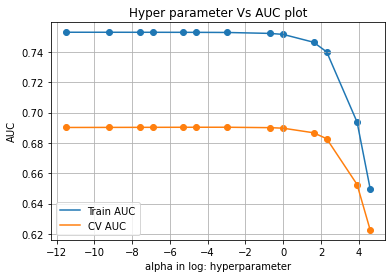

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,0.050510,5.143208e-03,0.016072,6.334391e-04,0.00001,{'alpha': 1e-05},0.703398,0.678771,0.688434,0.690201,0.010131,7,0.745823,0.758716,0.754388,0.752976,0.005357
4,0.052083,7.362493e-03,0.020827,7.360245e-03,0.0001,{'alpha': 0.0001},0.703474,0.678836,0.688434,0.690248,0.010140,6,0.745806,0.758697,0.754388,0.752964,0.005358
8,0.052085,7.369517e-03,0.015624,4.052337e-07,0.0005,{'alpha': 0.0005},0.703533,0.678883,0.688434,0.690283,0.010148,5,0.745789,0.758677,0.754388,0.752951,0.005359
10,0.057288,7.365583e-03,0.015624,4.495664e-07,0.001,{'alpha': 0.001},0.703557,0.678903,0.688433,0.690298,0.010151,4,0.745781,0.758666,0.754387,0.752945,0.005359
12,0.052088,7.359633e-03,0.015620,2.657295e-06,0.005,{'alpha': 0.005},0.703616,0.678947,0.688432,0.690332,0.010161,3,0.745754,0.758633,0.754381,0.752923,0.005358
1,0.052080,7.364291e-03,0.015624,6.743496e-07,0.01,{'alpha': 0.01},0.703640,0.678965,0.688430,0.690345,0.010164,2,0.745738,0.758611,0.754374,0.752908,0.005357
2,0.057025,7.187100e-03,0.021598,1.364181e-02,0.05,{'alpha': 0.05},0.703667,0.678983,0.688407,0.690353,0.010171,1,0.745658,0.758520,0.754319,0.752832,0.005355
5,0.057282,7.361938e-03,0.015624,2.023049e-06,0.5,{'alpha': 0.5},0.703327,0.678684,0.688210,0.690074,0.010147,8,0.745002,0.757877,0.753743,0.752208,0.005367
9,0.046873,5.619580e-07,0.015622,2.211003e-06,1,{'alpha': 1},0.702902,0.678296,0.687951,0.689716,0.010122,9,0.744310,0.757232,0.753109,0.751550,0.005389
11,0.057288,7.366033e-03,0.015624,5.619580e-07,5,{'alpha': 5},0.699209,0.675128,0.685750,0.686696,0.009854,10,0.738961,0.752131,0.748059,0.746384,0.005506


In [100]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math

NBclf = MultinomialNB(fit_prior=True, class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(NBclf, parameters, cv=3, scoring='roc_auc',return_train_score = True,n_iter =13)
print(X_tr_set1.shape)
clf.fit(X_tr_set1, y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)
print(results.head(2))
print(results.shape)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alphas =  results['param_alpha']
print(type(alphas))
alphas = [math.log(alpha) for alpha in alphas.values]

plt.plot(alphas, train_auc, label='Train AUC')

plt.plot(alphas, cv_auc, label='CV AUC')

plt.scatter(alphas, train_auc)
plt.scatter(alphas, cv_auc)


plt.legend()
plt.xlabel("alpha in log: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [101]:
print("Best alpha found: 0.001")
best_alpha =0.001

Best alpha found: 0.001


In [102]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

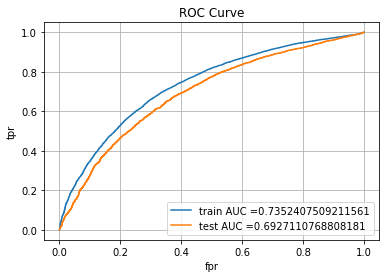

In [103]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


NBclf = MultinomialNB(alpha = best_alpha,fit_prior=True, class_prior=[0.5, 0.5])
NBclf.fit(X_tr_set1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NBclf, X_tr_set1)    
y_test_pred = batch_predict(NBclf, X_te_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [104]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [105]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#print("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
#print("Test confusion matrix")
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.46270672052918516 for threshold 0.413


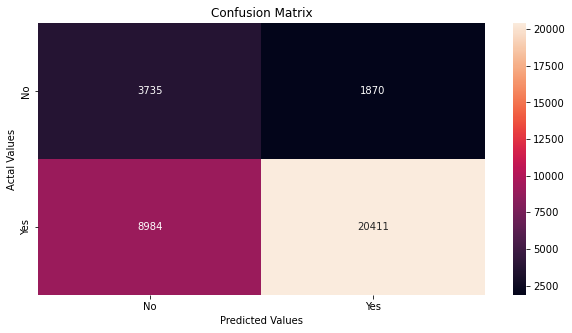

In [106]:
# Ploting confusion matrix as heatmap table
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
cm_df = pandas.DataFrame(cm_train,
                 index = ["No", "Yes"], 
                 columns = ["No", "Yes"])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


#### Set 2

In [117]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



(35000, 5101)
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.054656      0.007597         0.016747        0.001584           5   
1       0.046869      0.000004         0.015627        0.000004         0.5   

           params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 5}           0.619765           0.606352           0.620950   
1  {'alpha': 0.5}           0.674491           0.652230           0.666778   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.615689        0.006620               10            0.653981   
1         0.664500        0.009229                8            0.722370   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.665855            0.664344          0.661394         0.005278  
1            0.733357            0.731978          0.729235         0.004887  
(13, 17)
<class 'pandas.core.series.Series'>


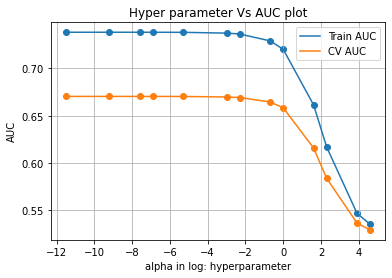

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
12,0.048175,9.268823e-04,0.020841,7.359074e-03,0.00001,{'alpha': 1e-05},0.681422,0.657890,0.671884,0.670399,0.009664,1,0.732148,0.742448,0.740573,0.738390,0.004479
3,0.059030,8.838583e-03,0.021308,8.037235e-03,0.0001,{'alpha': 0.0001},0.681422,0.657888,0.671883,0.670398,0.009665,2,0.732146,0.742446,0.740572,0.738388,0.004479
5,0.052245,7.580203e-03,0.019408,5.355629e-03,0.0005,{'alpha': 0.0005},0.681415,0.657884,0.671880,0.670393,0.009664,3,0.732138,0.742439,0.740565,0.738381,0.004480
7,0.058605,9.068811e-03,0.013584,7.829075e-03,0.001,{'alpha': 0.001},0.681410,0.657876,0.671877,0.670388,0.009665,4,0.732127,0.742429,0.740556,0.738370,0.004481
4,0.055375,6.461610e-03,0.016731,1.563818e-03,0.005,{'alpha': 0.005},0.681353,0.657817,0.671835,0.670335,0.009667,5,0.732050,0.742353,0.740487,0.738297,0.004482
2,0.052082,7.363224e-03,0.015629,6.979147e-06,0.05,{'alpha': 0.05},0.680710,0.657292,0.671415,0.669806,0.009628,6,0.731149,0.741513,0.739705,0.737456,0.004520
8,0.054114,6.427799e-03,0.020184,7.861409e-03,0.1,{'alpha': 0.1},0.679989,0.656759,0.670922,0.669223,0.009559,7,0.730160,0.740599,0.738847,0.736535,0.004564
1,0.046869,4.304760e-06,0.015627,3.841097e-06,0.5,{'alpha': 0.5},0.674491,0.652230,0.666778,0.664500,0.009229,8,0.722370,0.733357,0.731978,0.729235,0.004887
9,0.046871,1.946680e-07,0.015624,5.947204e-07,1,{'alpha': 1},0.667516,0.646328,0.661301,0.658382,0.008893,9,0.713118,0.724540,0.723468,0.720375,0.005150
0,0.054656,7.596980e-03,0.016747,1.583608e-03,5,{'alpha': 5},0.619765,0.606352,0.620950,0.615689,0.006620,10,0.653981,0.665855,0.664344,0.661394,0.005278


In [118]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math

NBclf = MultinomialNB(fit_prior=True, class_prior=[0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(NBclf, parameters, cv=3, scoring='roc_auc',return_train_score = True,n_iter =13)
print(X_tr_set2.shape)
clf.fit(X_tr_set2, y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)
print(results.head(2))
print(results.shape)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alphas =  results['param_alpha']
print(type(alphas))
alphas = [math.log(alpha) for alpha in alphas.values]

plt.plot(alphas, train_auc, label='Train AUC')

plt.plot(alphas, cv_auc, label='CV AUC')

plt.scatter(alphas, train_auc)
plt.scatter(alphas, cv_auc)


plt.legend()
plt.xlabel("alpha in log: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [120]:
print("Best alpha found: 0.1")
best_alpha =0.1

Best alpha found: 0.1


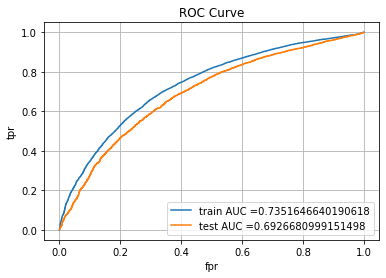

In [121]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


NBclf = MultinomialNB(alpha = best_alpha,fit_prior=True, class_prior=[0.5, 0.5])
NBclf.fit(X_tr_set1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NBclf, X_tr_set1)    
y_test_pred = batch_predict(NBclf, X_te_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [122]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [123]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#print("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
#print("Test confusion matrix")
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.46278525342853094 for threshold 0.413


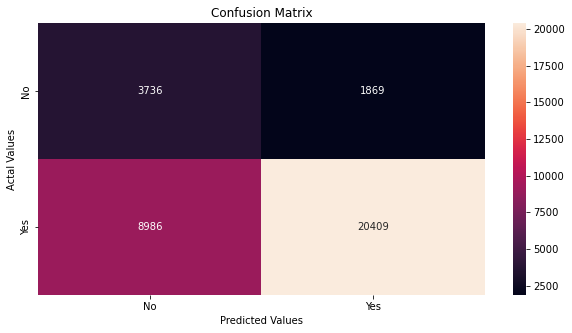

In [128]:
# Ploting confusion matrix as heatmap table
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
cm_df = pandas.DataFrame(cm_train,
                 index = ["No", "Yes"], 
                 columns = ["No", "Yes"])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [125]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

# Chosen Set 1

In [126]:
# Printing top 20 features corresponding to y =1 (Approved projects)
print(NBclf.feature_log_prob_.shape)
approved_prjts_probs_indices = NBclf.feature_log_prob_[1].argsort()[::-1]
approved_prjts_top20_indices = approved_prjts_probs_indices[0:20]
print(approved_prjts_top20_indices)

#Order followed in hstack : X_train_teacher_ohe, X_train_prjt_grade_category_ohe, X_train_school_state_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_essay_bow

features_list = []
features_list.extend(X_train_teacher_features)
features_list.extend(X_train_prjt_grade_category_features)
features_list.extend(X_train_school_state_features)
features_list.extend(X_train_clean_categories_features)
features_list.extend(X_train_clean_subcategories_features)
features_list.append("Price")
features_list.append("teacher_number_of_previously_posted_projects")
features_list.extend(bow_features)
print(len(features_list))
print("-"*100)
print("Top 20 features corresponding to positive class label (y=1) i.e Approved projects are listed below: ")
for idx in approved_prjts_top20_indices:
    print(features_list[idx])

# Printing top 20 features corresponding to y =0 (Not Approved projects)

Not_approved_prjts_probs_indices = NBclf.feature_log_prob_[0].argsort()[::-1]
Not_approved_prjts_top20_indices = Not_approved_prjts_probs_indices[0:20]
print(Not_approved_prjts_top20_indices)
print("-"*100)
print("Top 20 features corresponding to negative class label (y=0) i.e Not Approved projects are listed below: ")
for idx in Not_approved_prjts_top20_indices:
    print(features_list[idx])


(2, 5101)
[4099 3684 2861  779 2398 4510 3016 4569 2342 2881 1960 2665 2925 4981
 3500 4884 2938 4764 1096  190]
5101
----------------------------------------------------------------------------------------------------
Top 20 features corresponding to positive class label (y=1) i.e Approved projects are listed below: 
students
school
my
classroom
learning
the
not
they
learn
my students
help
many
nannan
work
reading
we
need
use
day
able
[4099 3684 2398 2861  779 3016 2342 4569 1960 4510 2881 2925 2665 4884
 2938 4981  872 5052  190 3500]
----------------------------------------------------------------------------------------------------
Top 20 features corresponding to negative class label (y=0) i.e Not Approved projects are listed below: 
students
school
learning
my
classroom
not
learn
they
help
the
my students
nannan
many
we
need
work
come
year
able
reading


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [132]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
print("Conclusion:")
print("In this assignment we have successfully encoded all the features (numerical,categorical,text) via various methodologies and ran Naive Bayes classifier to train/test our dataset. Also,plotted AUC curve and confusion matrix to analyse the effectiveness of Naive Bayes classifier.")
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Train  AUC ", "Test AUC"]
x.add_row(["BOW", "Naive Bayes", 0.001,0.73523,0.6927])
x.add_row(["TFIDF", "Naive Bayes", 0.1,0.73522,0.6926])

print(x)
print("With both sets we got AUC more than 50% hence the model is a good model")


Conclusion:
In this assignment we have successfully encoded all the features (numerical,categorical,text) via various methodologies and ran Naive Bayes classifier to train/test our dataset. Also,plotted AUC curve and confusion matrix to analyse the effectiveness of Naive Bayes classifier.
+------------+-------------+-----------------+-------------+----------+
| Vectorizer |    Model    | Hyper Parameter | Train  AUC  | Test AUC |
+------------+-------------+-----------------+-------------+----------+
|    BOW     | Naive Bayes |      0.001      |   0.73523   |  0.6927  |
|   TFIDF    | Naive Bayes |       0.1       |   0.73522   |  0.6926  |
+------------+-------------+-----------------+-------------+----------+
With both sets we got AUC more than 50% hence the model is a good model
